# SubBeamNod Data Reduction
---------------------------
This notebook shows how to use `dysh` to calibrate an SubBeamNod observation via two different methods. It retrieves and calibrates SubBeamNod scans using `GBTFITSLoad.subbeamnod()` which returns a `ScanBlock` object. 

In [1]:
# Import the `dysh` function to get the example data and the class that handles GBT SDFITS data.
from dysh.util.data import get_example_data
from dysh.fits.gbtfitsload import GBTFITSLoad

## Data Retrieval

First, we download the example SDFITS data, if necessary.

In [2]:
filename = get_example_data("subbeamnod")


Data is available in : /home/scratch/psalas/.cache/dysh/AGBT13A_124_06.raw.acs.fits


## Data Loading

Next, we use `GBTFITSLoad` to load the data.

In [3]:
sdfits = GBTFITSLoad(filename)

The returned `sdfits` can be probed for information.

In [4]:
sdfits.info()

Filename: /home/scratch/psalas/.cache/dysh/AGBT13A_124_06.raw.acs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  SINGLE DISH    1 BinTableHDU    229   1600R x 70C   ['32A', '1D', '22A', '1D', '1D', '1D', '2048E', '16A', '6A', '8A', '1D', '1D', '1D', '4A', '1D', '4A', '1D', '1I', '32A', '32A', '1J', '32A', '16A', '1E', '8A', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '8A', '1D', '1D', '12A', '1I', '1I', '1D', '1D', '1I', '1A', '1I', '1I', '16A', '16A', '1J', '1J', '22A', '1D', '1D', '1I', '1A', '1D', '1E', '1D', '1A', '1A', '8A', '1E', '1E', '16A', '1I', '1I', '1I']   


You can also print a concise (or verbose if you choose `verbose=True`) summary of the data.

In [5]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,44,vIIzw31,16090.0,SubBeamNod,1,48.940955,48.990955,2,2,100,2,353.896698,47.758182


## Data Reduction
Retrieve and calibrate a SubBeamNod scan. There are two different methods for calibrating a SubBeamNod scan.  The first, with `method='cycle'` (the default) averages the data in each subreflector state for each cycle of integrations. 

In [6]:
sbn_cycle = sdfits.subbeamnod(scan=44, fdnum=1, ifnum=0, plnum=0, weights='tsys', method='cycle')

Time average it, then plot it. Here, we use system temperature weighting.

In [7]:
ta_cycle = sbn_cycle.timeaverage(weights='tsys')

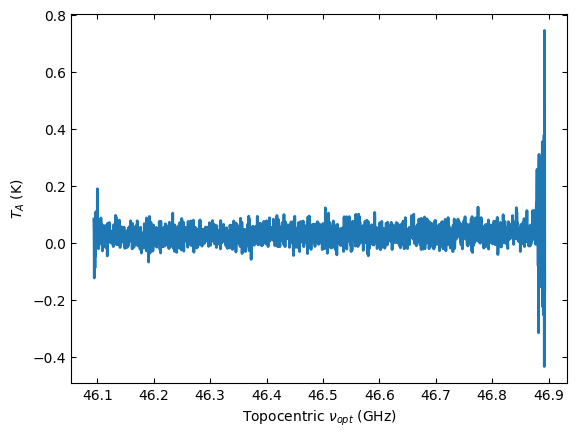

In [8]:
ta_cycle.plot(xaxis_unit="GHz")

The second method ("scan") of calibrating SubBeamNod scans reproduces the method implemented in `snod.pro`, the `GBTIDL` procedure writen by D. Frayer to calibrate SubBeamNod observations. This method treats the entire group of integrations as one cycle. 


In [9]:
sbn_scan = sdfits.subbeamnod(scan=44, fdnum=1, ifnum=0, plnum=0, weights='tsys', method='scan')

In [10]:
ta_scan = sbn_scan.timeaverage(weights='tsys')

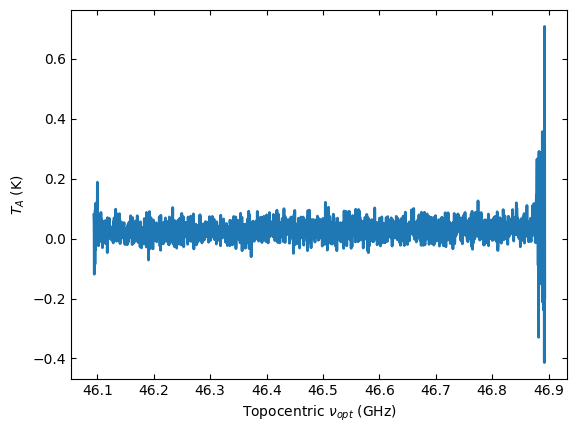

In [11]:
ta_scan.plot(xaxis_unit="GHz")

The difference between the two methods can be see by subtracting the spectra and plotting.


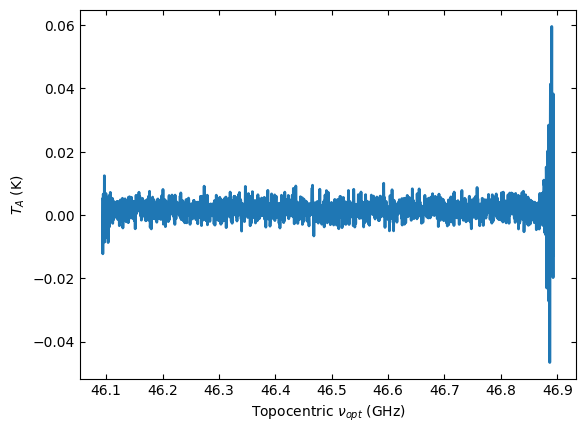

In [12]:
(ta_cycle - ta_scan).plot(xaxis_unit="GHz")

There is an offset in the continuum and noise levels between the two methods. Which one is preferred will depend on the observing setup and conditions.

---------------

## Calibration Using Selection

An alternative method of calibrating the data is to use the `select` method to select the data to be calibrated.

In [13]:
sdfits.select(scan=44, fdnum=1, ifnum=0, plnum=0)
sdfits.selection.show()

 ID    TAG    SCAN IFNUM PLNUM FDNUM # SELECTED
--- --------- ---- ----- ----- ----- ----------
  0 e84f051a2   44     0     0     1        200


In [14]:
sb = sdfits.subbeamnod(weights='tsys')
ta_select = sb.timeaverage(weights='tsys')

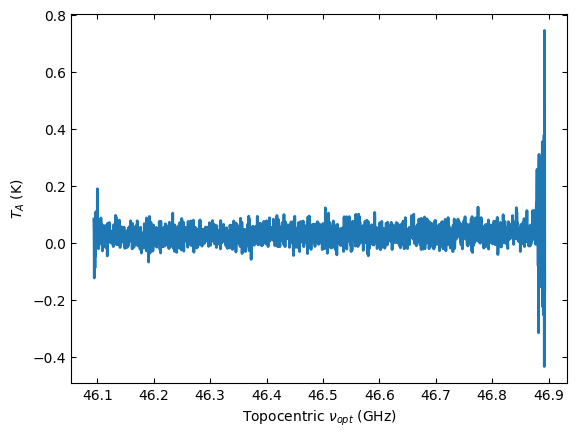

In [15]:
ta_select.plot(xaxis_unit="GHz")

If we compare the calibrated spectra using selection and specifying the data to be calibrated when calling the calibration function, we see that their difference is zero.

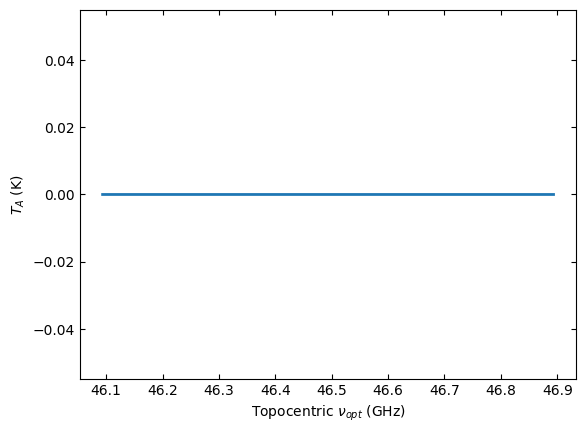

In [16]:
(ta_select - ta_cycle).plot(xaxis_unit="GHz")